In [17]:
import pandas as pd
import os

In [18]:
dir = "fotsCarrilCompleto"
csvFiles = []
for root,dirs,files in os.walk(dir):
    for file in files:
       if file.endswith(".csv"):
           dirFile = os.path.join(dir, file)
           csvFile = pd.read_csv(dirFile, index_col="Unnamed: 0")
           csvFiles.append((file, csvFile))
           print("*"*50)
           print("FILE NAME: ", file)
           print(csvFile.describe())
           

**************************************************
FILE NAME:  dataFrameCarrilAntihorario.csv
            Angulo    Velocidad
count  2513.000000  2513.000000
mean     65.654596   439.076801
std      21.306343    69.267833
min      30.000000     0.000000
25%      60.000000   450.000000
50%      60.000000   450.000000
75%      90.000000   450.000000
max      90.000000   450.000000
**************************************************
FILE NAME:  dataFrameCarrilAntihorario2.csv
            Angulo    Velocidad
count  2894.000000  2894.000000
mean     66.019350   438.648929
std      21.058598    70.575182
min      30.000000     0.000000
25%      60.000000   450.000000
50%      60.000000   450.000000
75%      90.000000   450.000000
max      90.000000   450.000000
**************************************************
FILE NAME:  dataFrameCarrilHorario.csv
            Angulo    Velocidad
count  2683.000000  2683.000000
mean     48.702944   421.319419
std      19.381625   109.946311
min      30.00000

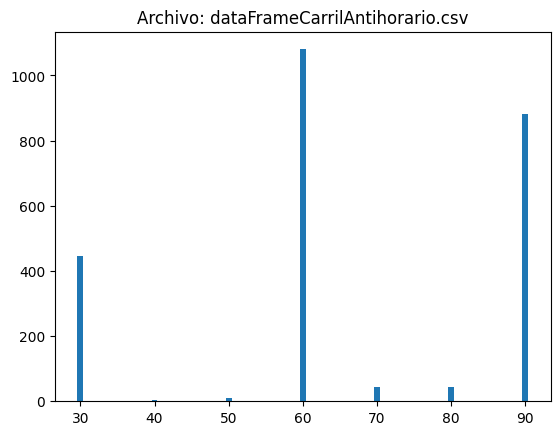

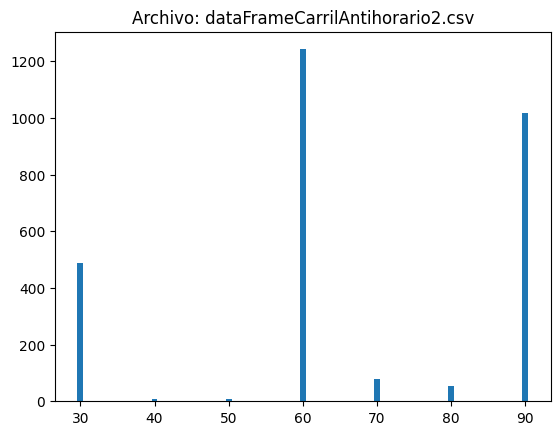

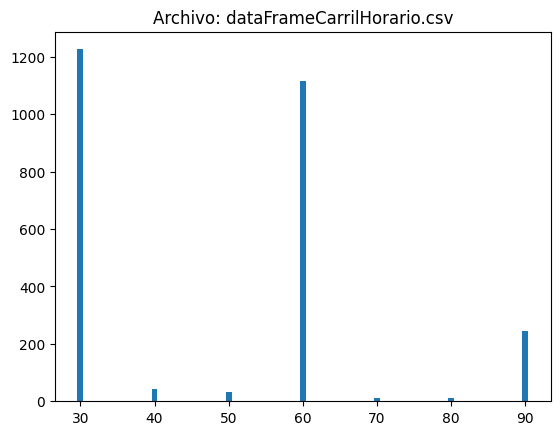

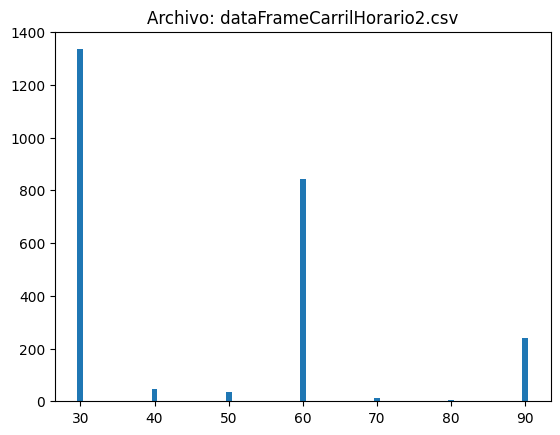

In [19]:
import matplotlib.pyplot as plt
for csv in csvFiles:
    fig, ax = plt.subplots()
    ax.bar(csv[1]["Angulo"].value_counts().index, csv[1]["Angulo"].value_counts())
    ax.set_title("Archivo: "+str(csv[0]))
    plt.show()

**Combinando dataframes**

In [20]:
combined_df = pd.DataFrame()
list_df=[]
for csv in csvFiles:
    df = csv[1]
    new_df = df[(df["Velocidad"]!=0) & ((df["Angulo"]==30) | (df["Angulo"]==60) | (df["Angulo"]==90)) ].copy()
    #new_df = df[(df["Velocidad"]!=0)].copy()
    print("\n")
    new_df["Nombre_imagen"]="fotos"+str(csv[0][9:-4])+"/"+new_df["Nombre_imagen"].str.split("/").str.get(-1)
    list_df.append(new_df)
combined_df=pd.concat(list_df)

In [21]:
print(combined_df.describe())
combined_df.to_csv("dataFrameFinal.csv")


            Angulo  Velocidad
count  9802.000000     9802.0
mean     56.593552      450.0
std      22.983647        0.0
min      30.000000      450.0
25%      30.000000      450.0
50%      60.000000      450.0
75%      60.000000      450.0
max      90.000000      450.0


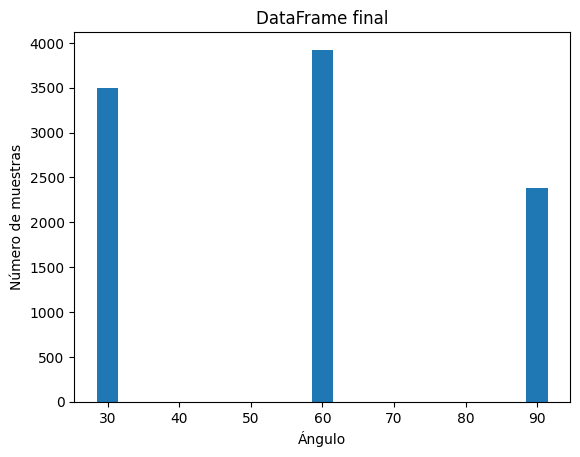

In [22]:
fig, ax = plt.subplots()
ax.bar(combined_df["Angulo"].value_counts().index, combined_df["Angulo"].value_counts(), width=3)
ax.set_title("DataFrame final")
ax.set_xlabel("Ángulo")
ax.set_ylabel("Número de muestras")
plt.show()

**Equalizing classes**

In [23]:
grupos = combined_df.groupby("Angulo")

In [24]:
min =grupos.size().min()

In [25]:
print(min)

2383


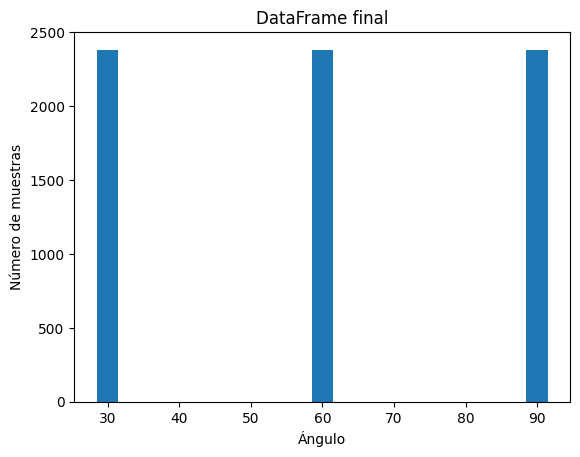

In [26]:
undersampled_df = pd.DataFrame()
for name, group in grupos:
    undersampled_df = pd.concat([undersampled_df, group.sample(min)])
fig, ax = plt.subplots()
ax.bar(undersampled_df["Angulo"].value_counts().index, undersampled_df["Angulo"].value_counts(), width=3)
ax.set_title("DataFrame final")
ax.set_xlabel("Ángulo")
ax.set_ylabel("Número de muestras")
plt.show()

In [16]:
undersampled_df.to_csv("dataFrameFinalSinAumentar.csv")